In [77]:
import pandas as pd
import matplotlib.pyplot as plt

In [78]:
df_thread = pd.read_csv('bubble_thread.txt', sep=';', header=None)
df_bubble = pd.read_csv('bubble.txt', sep=';', header=None)


In [79]:
df_thread.columns = ["num_arrays", "time", "size"]
df_bubble.columns = ["num_arrays", "time", "size"]

In [80]:
df = pd.DataFrame({"num_arrays": df_thread["num_arrays"], 'thread': df_thread["time"], 'bubble': df_bubble["time"]})
df.head()

,num_arrays,thread,bubble
0,1,0.000257,0.000003
1,2,0.000192,0.000004
2,3,0.000335,0.000007
3,4,0.000501,0.000010
4,5,0.000421,0.000011


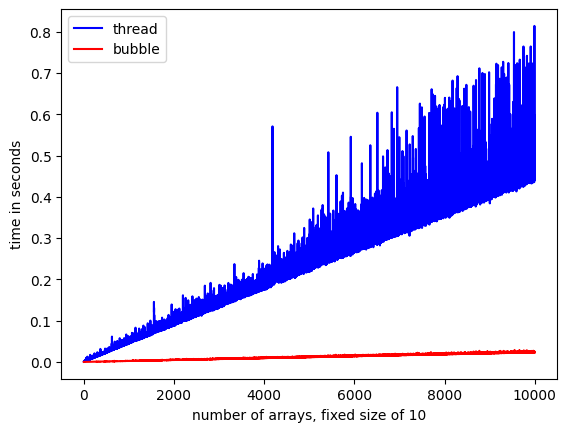

In [81]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='num_arrays', y='thread', color="blue", ax=ax)
df.plot(kind='line',x='num_arrays', xlabel=f"number of arrays, fixed size of {df_thread['size'][0]}", y='bubble', ylabel="time in seconds", color="red", ax=ax)

plt.show()